<div style='background-color: lightgreen; padding:10px'>
<h2> Benmansour Oussama</h2>
<h2> Groupe 1 IAA </h2>
<h2 style='text-align:center' >  Tp 1 Imagerie medicale</h2>
<div>

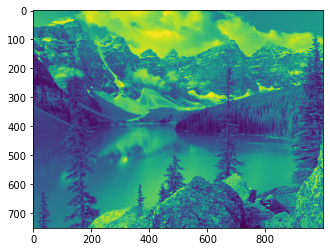

122


In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from IPython.display import display, Markdown
import cv2

# disable pixel intensity values warnings
import warnings
warnings.filterwarnings('ignore')


img= cv2.imread('./nature.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
M=img.shape[0]
N=img.shape[1]

imgplot= plt.imshow(img)
plt.show()
print(img[100][100])


In [2]:
def Gray_Histogram(img):
    # intialize empty zero filled array of 256 values
    hist=np.zeros(256)
    
    # iterate through the image to increment the respective pixels intensities
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            hist[img[x][y]]+=1
    return hist

def GrayBinHistogram(img, bins):
    M=img.shape[0]
    N=img.shape[1]
    hist=(np.zeros(bins))
    binsList=[]
    binSize=math.floor(256/bins)
    for i in range(1,bins+1,1):
        binsList.append(str(i*binSize))
    for x in range(M):
        for y in range(N):
            if(math.floor(img[x][y]/binSize)>=bins):
                hist[math.floor((img[x][y]/binSize))-1]+=1
            else:
                hist[math.floor(img[x][y]/binSize)]+=1
    return [binsList, hist]

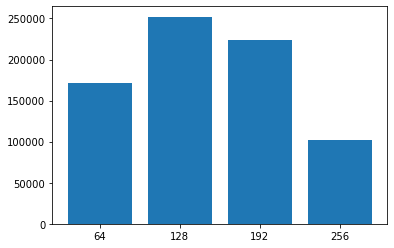

In [3]:
def showBarHistogram(binsList,hist):
    plt.bar(binsList, hist)
    plt.show()


histogram=GrayBinHistogram(img,4)
showBarHistogram(histogram[0], histogram[1])

In [4]:
    def segmentImage(img, horizental, vertical):
        if(len(img.shape)==3):
            if(img.shape[2]==3):
                img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        regions=[]
        horizentalSize=math.floor(img.shape[1]/horizental)
        verticalSize=math.floor(img.shape[0]/vertical)

        for i in range(horizental):
            for j in range(vertical):
                region=np.array(np.zeros((verticalSize,horizentalSize)), dtype='int64')
                for x in range(verticalSize-1):
                    for y in range(horizentalSize-1):
                        region[x][y]=img[x+(verticalSize*j)][y+(horizentalSize*i)]
                regions.append(region)

        return regions

    regions=segmentImage(img,3,1)
    
    def segmentationHistogram(segments, bins):
        histograms=[]
        for segment in segments:
            histograms.append(GrayBinHistogram(segment,4))
        return histograms
        

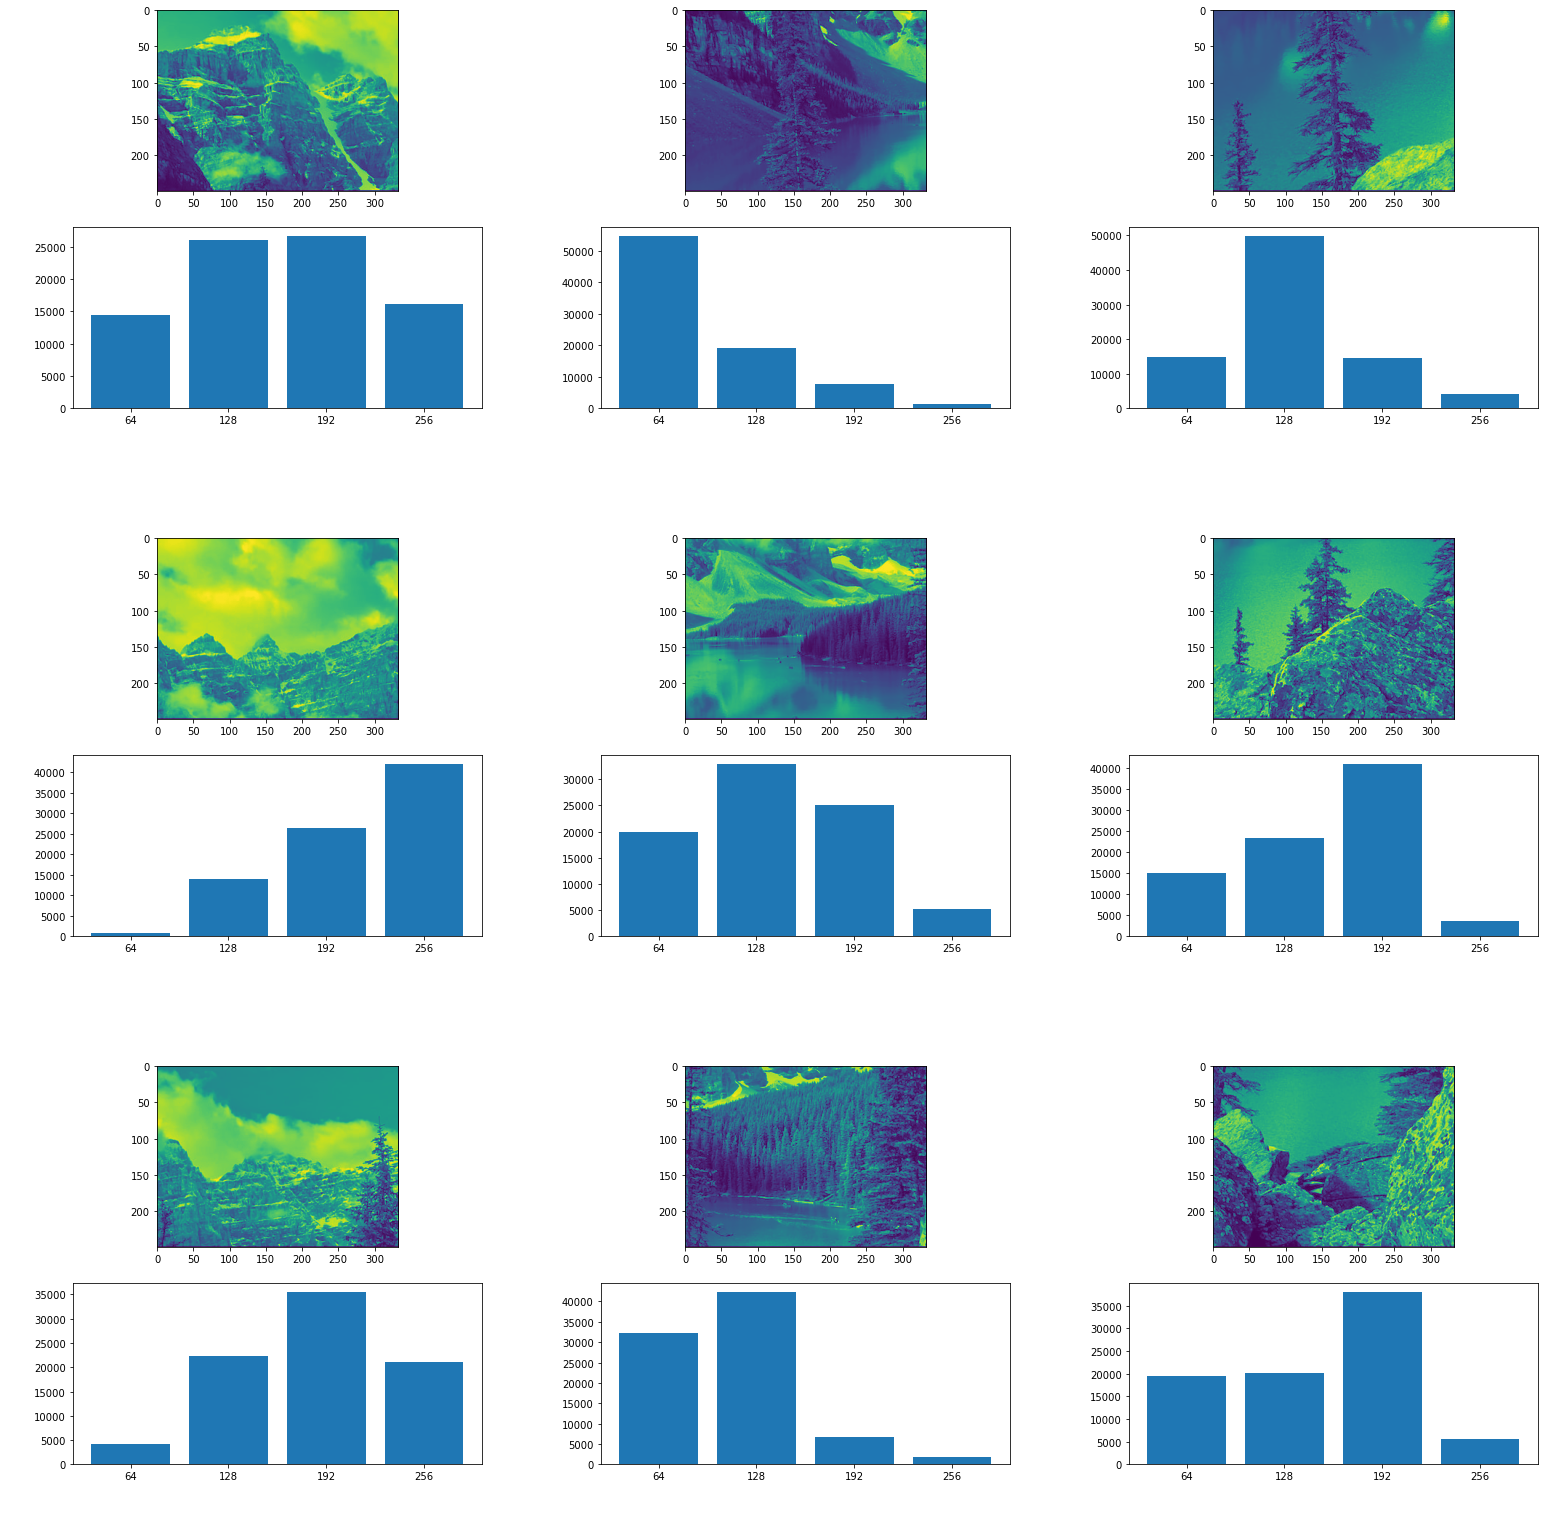

'# diplay each image and below it its histogram in gray level\ni=0\naxes=[]\nfor subfig in subfigs:\n    if(i==h*v*2):\n        break\n    subfig.set_facecolor(\'0.75\')\n    axes.append(subfig.subplots(2,1).flatten())\n    axes[i][0].imshow(new_imgs[i])\n    axes[i][1].plot(Gray_Histogram(new_imgs[i]))\n    axes[i][1].set_xlabel("pixel intensity", fontsize="xx-large")\n    axes[i][1].set_ylabel("number of pixels", fontsize="xx-large")\n    \n    i=i+1\n'

In [5]:
segments=segmentImage(img,3,3)
histograms=segmentationHistogram(segments,4)
h=3
v=3
# intialize global figure with size= 22 inches x 22 inches
fig=plt.figure(figsize=(22,22))

# devide global figure into 2x3 subfigures, for each thematic mapper image
subfigs = fig.subfigures(h,v, wspace=0.01)
# from grid to line (i*N + j)
subfigAxes=[]
for i in range(h):
    for j in range(v):
        axes=subfigs[i][j].subplots(2, 1)
        axes[0].imshow(segments[(i*3)+j])
        axes[1].bar(histograms[(i*3)+j][0],histograms[(i*3)+j][1])
plt.show()
"""# diplay each image and below it its histogram in gray level
i=0
axes=[]
for subfig in subfigs:
    if(i==h*v*2):
        break
    subfig.set_facecolor('0.75')
    axes.append(subfig.subplots(2,1).flatten())
    axes[i][0].imshow(new_imgs[i])
    axes[i][1].plot(Gray_Histogram(new_imgs[i]))
    axes[i][1].set_xlabel("pixel intensity", fontsize="xx-large")
    axes[i][1].set_ylabel("number of pixels", fontsize="xx-large")
    
    i=i+1
"""

In [6]:
import os

def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername,filename))
        if img is not None:
            images.append(img)
    return images

def segmentAndSelect(imageList, horizental, vertical, bins):
    histogramList=[]
    for image in imageList:
        regions=segmentImage(image, horizental, vertical)
        histograms=segmentationHistogram(regions,bins)
        histogramList.append(histograms)
    return np.array(histogramList)

folderPath="./"
img_list_yes=load_images_from_folder(folderPath+"/yes")
img_list_no=load_images_from_folder(folderPath+"/no")



In [7]:
print(img_list_yes[0].shape)

(218, 180, 3)


In [8]:
histogramsYes=segmentAndSelect(img_list_yes,3,3,4)
histogramsNo=segmentAndSelect(img_list_no,3,3,4)
print(histogramsYes.shape)
print(histogramsNo.shape)

(155, 9, 2, 4)
(98, 9, 2, 4)


In [17]:
import pandas as pd
pd.DataFrame(histogramsYesNew).to_csv("./hists.csv")

In [10]:
smallestShape=[0,0]
for img in img_list_yes:
    smallestShape[0]+=img.shape[0]
    smallestShape[1]+=img.shape[1]
smallestShape[0]/=len(img_list_yes)
smallestShape[1]/=len(img_list_yes)
    
smallestShape[0]=math.floor(smallestShape[0]/10)*10
smallestShape[1]=math.floor(smallestShape[1]/10)*10
print(smallestShape)

[410, 360]


In [11]:
import pandas as ad
#print(histogramsYes[0])
histogramsYesNew=[]
for histogram in histogramsYes:
    line=[]
    for segment in histogram:
        line.append(segment[1])
    histogramsYesNew.append(np.concatenate(np.array(line)))
        
print(len(histogramsYesNew))

155


In [18]:
print(img_list_no[0].shape)

(630, 630, 3)
